# diagram
> graphviz DOT language to plot diagrams of the flow of calculation

In [ ]:
#| default_exp diagram

In [ ]:
#| hide
%reload_ext autoreload
%autoreload 2

In [ ]:
#| export
from micrograd_nbdev.engine import Value
from graphviz import Digraph

In [ ]:
#| export
def trace(root # `Value` node
         ):
    # each node of the calculation. List can be used as well for nodes and edges
    nodes = set()
    # each child of each node. For nodes that are not the result of an operation there will be none
    edges = set()
    def get_children(node):
        if node not in nodes:
            nodes.add(node)
            for child in node._prev:
                edges.add((node, child))
                get_children(child)
    
    get_children(root)
    return nodes, edges

In [ ]:
a = Value(2.0, label='a') # 2
b = Value(-3.0, label='b') # -3
c = Value(10.0, label='c') # 10
e = a*b; e.label = 'e' # -6
d = e + c; d.label = 'd' # 4
f = Value(-2.0, label='f') # -2
L = d*f; L.label='L' # -8
L
trace(L)

({Value(data=-2.0, grad=0),
  Value(data=-3.0, grad=0),
  Value(data=-6.0, grad=0),
  Value(data=-8.0, grad=0),
  Value(data=10.0, grad=0),
  Value(data=2.0, grad=0),
  Value(data=4.0, grad=0)},
 {(Value(data=-6.0, grad=0), Value(data=-3.0, grad=0)),
  (Value(data=-6.0, grad=0), Value(data=2.0, grad=0)),
  (Value(data=-8.0, grad=0), Value(data=-2.0, grad=0)),
  (Value(data=-8.0, grad=0), Value(data=4.0, grad=0)),
  (Value(data=4.0, grad=0), Value(data=-6.0, grad=0)),
  (Value(data=4.0, grad=0), Value(data=10.0, grad=0))})

In [ ]:
#| export
def draw_dot(root, # final node from which to trace
              format='svg', # rendering output format of DOT
              rankdir='LR' # TB (top to bottom graph) | LR (left to right)
             ):
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir':rankdir})
    
    for node in nodes:
        uid = str(id(node))
        # curly brackets are required to have a horizontal layout
        dot.node(uid, label = f"{{ {node.label} | {node.data :.4f} | {node.grad :.4f}}}", shape='record')
        #dot.node(uid, label = "%s | %.4f | %.4f" %(node.label, node.data, node.grad), shape='record')
        if node._op:
            dot.node(node._op+uid, label = node._op)
            dot.edge(node._op+uid, uid)

    for node, child in edges:
        # children are connected to nodes via operations
        dot.edge(str(id(child)), node._op+str(id(node)))

    return dot

### Examples

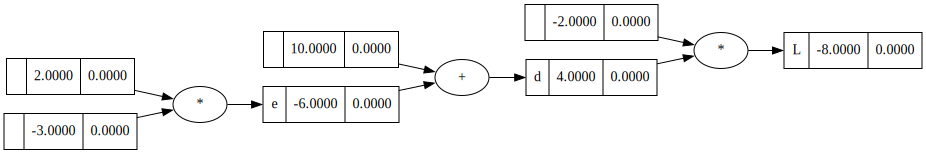

In [ ]:
draw_dot(L)

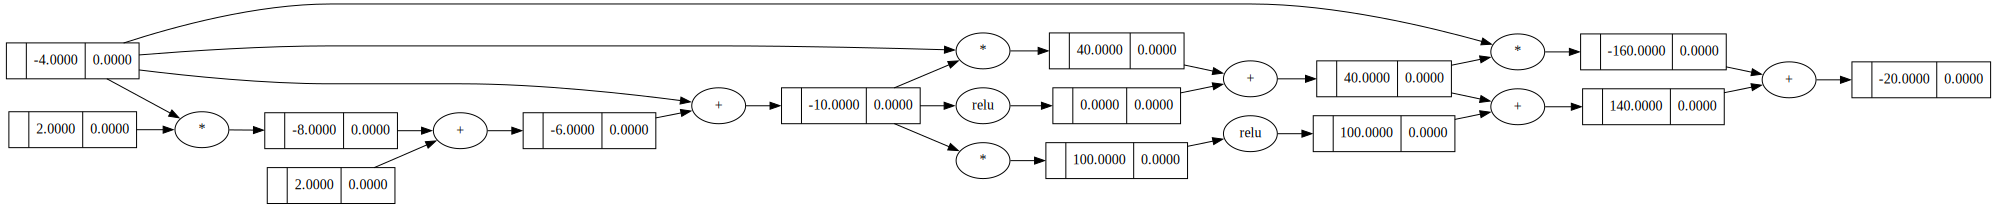

In [ ]:
x = Value(-4.0)
z = 2 * x + 2 + x
q = z.relu() + z * x
h = (z * z).relu()
y = h + q + q * x
y
draw_dot(y)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()